# Lecture 13: The Universality of the Uniform and The Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_CDF(X):
    
    data_sorted = np.sort(X)
    
    p = 1 * np.arange(len(X)) / (len(X) - 1)
    
    return data_sorted, p

In [3]:
class exp_CDF:
    def __init__(self, lmbda = 1):
        self.lmbda = lmbda
    
    def evaluate(self, x):
        return 1 - np.exp(-self.lmbda * x)
    
    def inverse(self, y):
        return -np.log(1-y)/self.lmbda

## Part 1. The Universality of the Uniform

Let $U \sim \textrm{Uniform}(0, 1)$ and let $F$ be a monotonically increasing CDF.

The theorem of the universality of the uniform means if $X = F^{-1}(U)$ then $X \sim F$.

Also, for any random var $X$, if it is distributed by $F$ then $F(X) \sim \textrm{Uniform}(0, 1)$

In [4]:
U_vars = np.random.uniform(0, 1, size=50_000)
F = exp_CDF(lmbda=1.5)
X = F.inverse(U_vars)

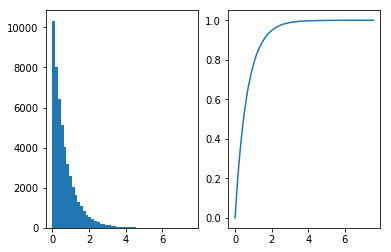

In [5]:
CDF_x, CDF_y = calculate_CDF(X)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.hist(X, bins=50)

ax2 = fig.add_subplot(122)
ax2.plot(CDF_x, CDF_y)
plt.show()

This way, so long as we have a CDF (and inverse CDF) of a function, then we can simulate any distribution that we want.

Note, that if we now take $X$ and plug it back into $F(x)$ then we will get our $U(0, 1)$ back.

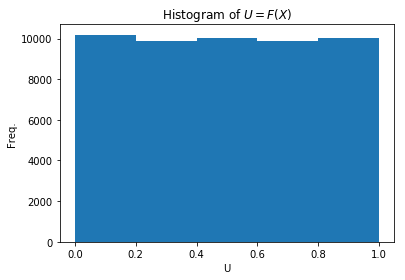

In [6]:
U_return = F.evaluate(X)

plt.hist(U_return, bins=5)
plt.ylabel("Freq.")
plt.xlabel("U")
plt.title("Histogram of $U = F(X)$")
plt.show()

What's the proof of this?

### Point 1.2 What's the Proof

If we have a CDF then by definition we have $P(X \leq x)$

* $X \sim F^{-1}(U) \longrightarrow P(F^{-1}(U) \leq x)$ [1]
* $P(F^{-1}(U) \leq x) \longrightarrow \textrm{via applying F} \longrightarrow P(U \leq F(x))$ [2]

It's worth noting that [1] = [2]

So what's the probability that U is less than F(x)? Well the Uniform is just a line between 0 and 1, F(x) will be a probability on that line (By definition, probs are between 0 and 1)

The probability of a uniform(0, 1) having a probability less than F(x) is the length from 0 to F(x). Well, that length is F(x)!

$$\therefore P(F^{-1}(U) \leq x) = F(x), \textrm{QED}$$

In english, "If you take a sample of U and then perform the inverse of the CDF on that random assortment, if you then calculate the CDF you will get the CDF of the inverse you used to calculate it."

## Point 2. Normal Distribution

Let's say that we want to discover things about the normal distribution $N(0, 1)$.

To get the PDF we need to use an exponential function that decays symmetrically on both sides:

$$f(z) = e^{\frac{-z^2}{2}}$$

In [7]:
def unnorm_norm(z):
    return np.exp(-(z**2)/2)

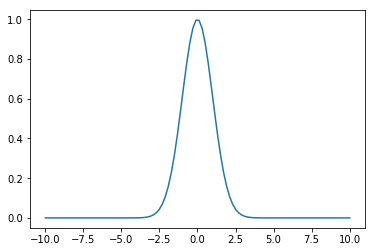

In [8]:
X = np.linspace(-10, 10, 100)
y = unnorm_norm(X)

plt.plot(X, y)
plt.show()

Think of the division by 2 as taking some kind of a mean between two values, the z needs to be squared so that -ve values of z become positive. (It's also symmetrical)

So, now we have to ask the question, what should the normalising constant be in order to make sure that the integral of this function is 1? Well, we can evalute that using the computer but that won't give us a lot of insight as to what it is.

$$\int_{-\infty}^\infty e^{-\frac{e^2}{2}} dz$$

Unfortunately, there is a proof that shows that this unbounded integral is impossible to solve in closed form directly. 

However, there is still a way to solve it!

$$\int_{-\infty}^\infty e^{-\frac{x^2}{2}} dz\int_{-\infty}^\infty e^{-\frac{y^2}{2}} dy = \int_{-\infty}^\infty e^{\frac{-(x^2+y^2)}{2}} dx dy$$

You can realise now that $x^2 + y^2$ is actually a circle! So convert to polar coords and to the integral.

$$\int_0^{2\pi} \int_0^\infty e^{\frac{-r^2}{2}} r dr d\theta$$

Now, we can solve this using integration by parts where $u = \frac{r^2}{2}$ and $du = rdr$. Thus :

$$\int_0^\infty e^{-u}du = 1$$

$$\int_0^{2\pi} 1 d\theta = 2\pi$$

We did a square in order to get this so we'll just need to square root it to get our normalisation const

$$\therefore c = \frac{1}{\sqrt{2\pi}}$$

In [9]:
1/np.sqrt(2 * np.pi)

0.3989422804014327

In [10]:
def std_norm(z):
    return 1/np.sqrt(2 * np.pi) * np.exp(-(z**2)/2)

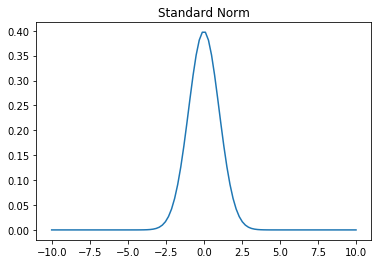

In [11]:
y2 = std_norm(X)

plt.plot(X, y2)
plt.title("Standard Norm")
plt.show()

### Part 2.2 Expectation and Variance of Std. Norm

We can get the expectation value from LOTUS:

$$E(Z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} z e^{\frac{-z^2}{2}} = 0$$

The reason this is true is by symmetry:

In [12]:
def std_norm_nth_moment(z, n):
    return 1/np.sqrt(2 * np.pi)* z**n  * np.exp(-(z**2)/2)

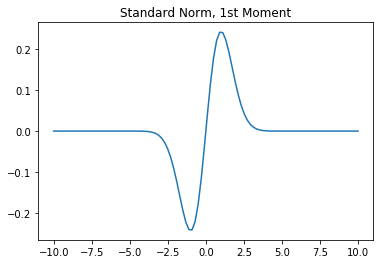

In [13]:
y3 = std_norm_nth_moment(X, 1)

plt.plot(X, y3)
plt.title("Standard Norm, 1st Moment")
plt.show()

In [14]:
y3.sum()

2.926037769671948e-16

We can see that the sum of this is very close to zero, but will never be zero because -you know- computers.

Now, what about $\textrm{Var}(Z)$?

$$\textrm{Var}(Z) = E(Z^2) - E(Z)^2 = E(Z^2)$$

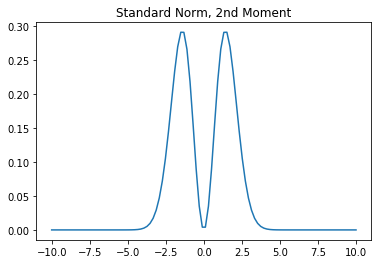

In [15]:
y4 = std_norm_nth_moment(X, 2)

plt.plot(X, y4)
plt.title("Standard Norm, 2nd Moment")
plt.show()

In [16]:
y4.sum()/y2.sum()

1.0000000000000002

Somehow the sums aren't working quite right and I'm not sure why. However, if I normalise it by the sum from the normal distribution then we can see that it is equal to 1.

We can notice that this is an even function, and so the integral form -inf to inf is equal to 2 times the integral from 0 to inf. Then, you can also do integration by parts:

$$\frac{2}{\sqrt{2\pi}} \int_0^\infty zze^{\frac{-z^2}{2}}$$

If $u=z$ and $dv = ze^{\frac{-z^2}{2}}$ then $du = dz$ and $v = -e^{\frac{-z^2}{2}}$. Thus:

$$\frac{2}{\sqrt{2\pi}} ([uv]_0^\infty + \int_0^\infty e^{\frac{-z^2}{2}} dz) = \frac{2}{\sqrt{2\pi}} + \frac{\sqrt{2\pi}}{2} = 1$$

So, now we've shown that the variance of the standard normal distribution is equal to 1 and that the expectation value is 0.